In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
# Read in CSV file. File is large (80k+ samples)
data = pd.read_csv('UTI_Patient_Data_File.csv')

# Create a backup dataframe for access to original data
data_backup = data

# Remove the display limit for columns 
pd.options.display.max_columns = None

# Preview data
data.head()

,ID,PATID,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,ua_ketones,ua_leuk,ua_nitrite,ua_ph,ua_protein,ua_rbc,ua_spec_grav,ua_urobili,ua_wbc,CVA_tenderness,abd_tenderness,abd_soft,abd_distended,abd_gaurding,abd_mass,abd_rebound,abd_rigidity,back_pain,fatigue,fever,vag_bleeding,vag_discharge,abd_distended2,abd_pain,gen_neg,pelvic_pain,alert,ams,weakness,oriented,psychiatric_confusion,flank_pain,dec_urine_vol,diff_urinating,dysuria,hematuria,polyuria,chief_complaint,age,gender,race,ethnicity,lang,maritalStatus,employStatus,insurance_status,disposition,arrival,Temp_First,Temp_Last,Temp_Max,Temp_Min,Temp_Mean,HR_First,HR_Last,HR_Max,HR_Min,HR_Mean,SBP_First,SBP_Last,SBP_Max,SBP_Min,SBP_Mean,DBP_First,DBP_Last,DBP_Max,DBP_Min,DBP_Mean,RR_First,RR_Last,RR_Max,RR_Min,RR_Mean,O2_Sat_First,O2_Sat_Last,O2_Sat_Max,O2_Sat_Min,O2_Sat_Mean,O2_Amount_First,O2_Amount_Last,O2_Amount_Max,O2_Amount_Min,O2_Amount_Mean,O2_Dependency_First,O2_Dependency_Last,GCS_First,GCS_Last,Absolute_Lymphocyte_Count,Alanine_Aminotransferase,Alkaline_Phosphatase,ANC,Anion_Gap,Aspartate_Aminotransferase,Basophils,BUN,Calcium,Chloride,CO2,Creatinine,Eosinophils,Glucose,Hematocrit,Hemoglobin,Lymphocytes,MCH,MCHC,MCV,Monocytes,MPV,Neutrophils,Platelets,Potassium,RBC,RDW,Sodium,WBC,abx,Abdominal_hernia,Abdominal_pain,Acute_and_unspecified_renal_failure,Anal_and_rectal_conditions,Calculus_of_urinary_tract,Cancer,Chronic_renal_failure,Congestive_heart_failure__nonhypertensive,Coronary_atherosclerosis_and_other_heart_disease,Delirium__dementia__and_amnestic_and_other_cognitive_disorders,Diabetes_mellitus_with_complications,Diabetes_mellitus_without_complication,Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__childbirth__or_the_puerperium,Genitourinary_congenital_anomalies,Genitourinary_symptoms_and_ill_defined_conditions,Heart_valve_disorders,HIV_infection,Hodgkins_disease,Hyperplasia_of_prostate,Inflammatory_conditions_of_male_genital_organs,Leukemias,Maintenance_chemotherapy__radiotherapy,Menstrual_disorders,Nephritis__nephrosis__renal_sclerosis,Non_Hodgkins_lymphoma,Other_and_ill_defined_heart_disease,Other_female_genital_disorders,Other_male_genital_disorders,Other_non_epithelial_cancer_of_skin,Pancreatic_disorders__not_diabetes_,Paralysis,Parkinsons_disease,Poisoning_by_nonmedicinal_substances,Prolapse_of_female_genital_organs,Pulmonary_heart_disease,Screening_and_history_of_mental_health_and_substance_abuse_codes,Septicemia__except_in_labor_,Sexually_transmitted_infections__not_HIV_or_hepatitis_,Substance_related_disorders,Urinary_tract_infections,ANALGESIC_AND_ANTIHISTAMINE_COMBINATION,ANALGESICS,ANESTHETICS,ANTI_OBESITY_DRUGS,ANTIALLERGY,ANTIARTHRITICS,ANTIASTHMATICS,ANTIBIOTICS,ANTICOAGULANTS,ANTIDOTES,ANTIFUNGALS,ANTIHISTAMINE_AND_DECONGESTANT_COMBINATION,ANTIHISTAMINES,ANTIHYPERGLYCEMICS,ANTIINFECTIVES,ANTIINFECTIVES_MISCELLANEOUS,ANTINEOPLASTICS,ANTIPARKINSON_DRUGS,ANTIPLATELET_DRUGS,ANTIVIRALS,AUTONOMIC_DRUGS,BIOLOGICALS,BLOOD,CARDIAC_DRUGS,CARDIOVASCULAR,CNS_DRUGS,COLONY_STIMULATING_FACTORS,CONTRACEPTIVES,COUGH_COLD_PREPARATIONS,DIAGNOSTIC,DIURETICS,EENT_PREPS,ELECT_CALORIC_H2O,GASTROINTESTINAL,HERBALS,HORMONES,IMMUNOSUPPRESANT,INVESTIGATIONAL,MISCELLANEOUS_MEDICAL_SUPPLIES__DEVICES__NON_DRUG,MUSCLE_RELAXANTS,PRE_NATAL_VITAMINS,PSYCHOTHERAPEUTIC_DRUGS,SEDATIVE_HYPNOTICS,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI,alt_diag
0,1,1,yes,few,negative,negative,clear,yellow,small,negative,negative,small,negative,7.5,negative,small,1.020,negative,moderate,0,1,not_reported,not_reported,1,0,0,0,0,0,0,not_reported,not_reported,not_reported,1,1,not_reported,1,not_reported,not_reported,1,not_reported,not_reported,not_reported,not_reported,not_reported,not_reported,not_reported,ABDOMINAL PAIN,83,Female,Other,Hispanic or Latino,Non-English,Widowed,Not Employed,Commercial,Admit,Car,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,3,3,3,3,3,1,1,1,1,1,4,4,4,4,4,not_reported,not_repor

In [3]:
#check the shape of the dataframe to know how many variables and samples
data.shape

(80387, 220)

In [4]:
#check all column headers/variables 
#data.keys()
print(data.columns.values)

['ID' 'PATID' 'UCX_abnormal' 'ua_bacteria' 'ua_bili' 'ua_blood'
 'ua_clarity' 'ua_color' 'ua_epi' 'ua_glucose' 'ua_ketones' 'ua_leuk'
 'ua_nitrite' 'ua_ph' 'ua_protein' 'ua_rbc' 'ua_spec_grav' 'ua_urobili'
 'ua_wbc' 'CVA_tenderness' 'abd_tenderness' 'abd_soft' 'abd_distended'
 'abd_gaurding' 'abd_mass' 'abd_rebound' 'abd_rigidity' 'back_pain'
 'fatigue' 'fever' 'vag_bleeding' 'vag_discharge' 'abd_distended2'
 'abd_pain' 'gen_neg' 'pelvic_pain' 'alert' 'ams' 'weakness' 'oriented'
 'psychiatric_confusion' 'flank_pain' 'dec_urine_vol' 'diff_urinating'
 'dysuria' 'hematuria' 'polyuria' 'chief_complaint' 'age' 'gender' 'race'
 'ethnicity' 'lang' 'maritalStatus' 'employStatus' 'insurance_status'
 'disposition' 'arrival' 'Temp_First' 'Temp_Last' 'Temp_Max' 'Temp_Min'
 'Temp_Mean' 'HR_First' 'HR_Last' 'HR_Max' 'HR_Min' 'HR_Mean' 'SBP_First'
 'SBP_Last' 'SBP_Max' 'SBP_Min' 'SBP_Mean' 'DBP_First' 'DBP_Last'
 'DBP_Max' 'DBP_Min' 'DBP_Mean' 'RR_First' 'RR_Last' 'RR_Max' 'RR_Min'
 'RR_Mean' 'O2_Sat

In [5]:
#check data types
data.dtypes

ID               int64
PATID            int64
UCX_abnormal    object
ua_bacteria     object
ua_bili         object
                 ...  
dispo           object
UTI_diag        object
split           object
abxUTI          object
alt_diag         int64
Length: 220, dtype: object

In [6]:
#check for null values
print(data.isnull().sum().values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
cols_missing_data = []
for col in data:
    missing = data[data[col]=='not_reported']
    amount_missing = len(missing)/len(data[col])
    if amount_missing > 0.10:
        cols_missing_data.append(col)
print(cols_missing_data)
print(len(cols_missing_data))

['ua_bacteria', 'ua_clarity', 'ua_epi', 'ua_rbc', 'ua_wbc', 'CVA_tenderness', 'abd_tenderness', 'abd_soft', 'abd_distended', 'abd_gaurding', 'abd_mass', 'abd_rebound', 'abd_rigidity', 'back_pain', 'fatigue', 'fever', 'vag_bleeding', 'vag_discharge', 'abd_distended2', 'abd_pain', 'gen_neg', 'pelvic_pain', 'alert', 'ams', 'weakness', 'oriented', 'psychiatric_confusion', 'flank_pain', 'dec_urine_vol', 'diff_urinating', 'dysuria', 'hematuria', 'polyuria', 'O2_Amount_First', 'O2_Amount_Last', 'O2_Amount_Max', 'O2_Amount_Min', 'O2_Amount_Mean', 'GCS_First', 'GCS_Last', 'Absolute_Lymphocyte_Count', 'Alanine_Aminotransferase', 'Alkaline_Phosphatase', 'ANC', 'Anion_Gap', 'Aspartate_Aminotransferase', 'Basophils', 'BUN', 'Calcium', 'Chloride', 'CO2', 'Creatinine', 'Eosinophils', 'Glucose', 'Hematocrit', 'Hemoglobin', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'MPV', 'Neutrophils', 'Platelets', 'Potassium', 'RBC', 'RDW', 'Sodium', 'WBC']
69


In [8]:
# Drop columns that aren't needed
data = data.drop(['ID','PATID','dispo','UTI_diag','split','abxUTI','alt_diag'], axis = 1)

In [3]:
# Gather information about dataset
# Number of positive and negative (UTI) samples
target_counts = data['UCX_abnormal'].value_counts()
print('Overall data target variable value counts: \n{}'.format(target_counts))

Overall data target variable value counts: 
no     62103
yes    18284
Name: UCX_abnormal, dtype: int64


In [4]:
# Balance the classes
data_original = data
data_UTI = data[data['UCX_abnormal']=='yes']
data_no_UTI = data[data['UCX_abnormal']=='no']
sampled_no_UTI = data_no_UTI.sample(n=18284)
data = pd.concat([data_UTI,sampled_no_UTI], ignore_index=True)

In [5]:
# Recheck counts/ Ensure classes are balanced
# Number of positive and negative (UTI) samples
target_counts = data['UCX_abnormal'].value_counts()
print('Overall data target variable value counts: \n{}'.format(target_counts))

Overall data target variable value counts: 
yes    18284
no     18284
Name: UCX_abnormal, dtype: int64


Overall data gender value counts: 
Female          26162
Male             9948
not_reported      458
Name: gender, dtype: int64


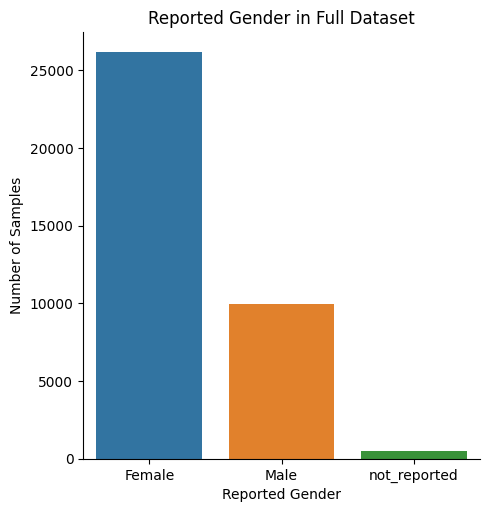

In [14]:
# Gather information about dataset
# Gender spread
gender_count = data['gender'].value_counts()
print('Overall data gender value counts: \n{}'.format(gender_count))
#plt.bar(gender_count.keys(),gender_count)
sns.catplot(x='gender', data = data, kind='count')
plt.xlabel('Reported Gender')
plt.ylabel('Number of Samples')
plt.title('Reported Gender in Full Dataset')
plt.show()

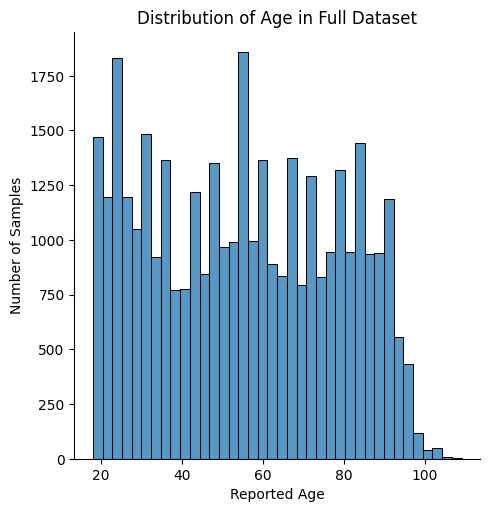

Ages range from 18 to 109.


In [9]:
# Gather information about dataset
# Age
#plt.hist(data['age'], bins=20)
sns.displot(data['age'])
plt.xlabel('Reported Age')
plt.ylabel('Number of Samples')
plt.title('Distribution of Age in Full Dataset')
plt.show()

print('Ages range from {} to {}.'.format(data['age'].min(),data['age'].max()))

Overall data race value counts: 
White or Caucasian                           19701
Black or African American                     7687
Other                                         6736
Hispanic/Latino                                861
not_reported                                   459
Patient Refused                                412
Asian                                          386
Unknown                                        269
American Indian or Alaska Native                36
Native Hawaiian or Other Pacific Islander       21
Name: race, dtype: int64


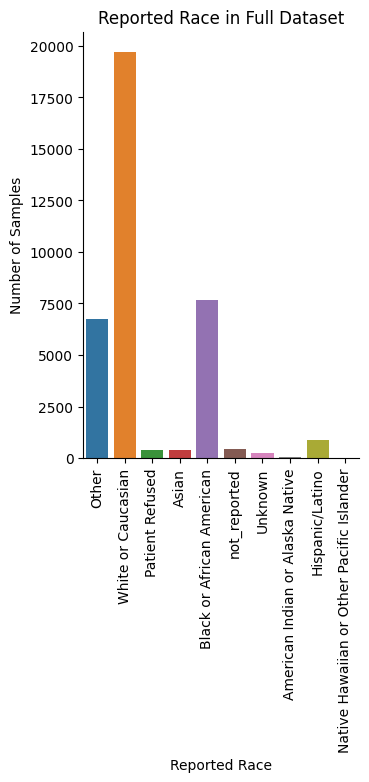

In [15]:
# Gather information about dataset
# Race
race_count = data['race'].value_counts()
print('Overall data race value counts: \n{}'.format(race_count))
#plt.bar(race_count.keys(),race_count)
sns.catplot(x = 'race', data = data, kind = 'count')
plt.xticks(rotation=90)
plt.xlabel('Reported Race')
plt.ylabel('Number of Samples')
plt.title('Reported Race in Full Dataset')
plt.show()

In [18]:
# Manual recode of natural order variables
# dont need ID, PATID, dispo, split

# Redefine the ua_clarity column
clarity_map = {'clear':0,'not_clear':1}

# Gather variables and create corresponding maps (not reported will be treated as other - other has
# to be the same number across the board)
bacteria_map = {'none':1,'few':2,'moderate':3,'many':4, 'marked':5}
                                                    
pos_neg_cols = ['ua_nitrite','ua_urobili']
pos_map = {'negative':0,'positive':1}

neg_large_cols = ['ua_bili','ua_blood','ua_epi','ua_glucose','ua_ketones',
               'ua_leuk','ua_protein','ua_rbc','ua_urobili',
               'ua_wbc']
neg_large_map = {'negative':1,'small':2,'moderate':3,'large':4,'4+':5,'other':6}

color_map = {'colorless':1,'yellow':2,'orange':3,'amber':4,'red':5,'other':6}

UCX_map = {'no':0,'yes':1}
yes_no_cols = ['abx','Abdominal_hernia','Abdominal_pain','Acute_and_unspecified_renal_failure',
 'Anal_and_rectal_conditions','Calculus_of_urinary_tract','Cancer','Chronic_renal_failure',
 'Congestive_heart_failure__nonhypertensive','Coronary_atherosclerosis_and_other_heart_disease',
 'Delirium__dementia__and_amnestic_and_other_cognitive_disorders','Diabetes_mellitus_with_complications',
 'Diabetes_mellitus_without_complication','Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__childbirth__or_the_puerperium',
 'Genitourinary_congenital_anomalies','Genitourinary_symptoms_and_ill_defined_conditions',
 'Heart_valve_disorders','HIV_infection','Hodgkins_disease','Hyperplasia_of_prostate',
 'Inflammatory_conditions_of_male_genital_organs','Leukemias','Maintenance_chemotherapy__radiotherapy',
 'Menstrual_disorders','Nephritis__nephrosis__renal_sclerosis','Non_Hodgkins_lymphoma',
 'Other_and_ill_defined_heart_disease','Other_female_genital_disorders','Other_male_genital_disorders',
 'Other_non_epithelial_cancer_of_skin','Pancreatic_disorders__not_diabetes_','Paralysis',
 'Parkinsons_disease','Poisoning_by_nonmedicinal_substances','Prolapse_of_female_genital_organs',
 'Pulmonary_heart_disease','Screening_and_history_of_mental_health_and_substance_abuse_codes',
 'Septicemia__except_in_labor_','Sexually_transmitted_infections__not_HIV_or_hepatitis_',
 'Substance_related_disorders','Urinary_tract_infections','ANALGESIC_AND_ANTIHISTAMINE_COMBINATION',
 'ANALGESICS','ANESTHETICS','ANTI_OBESITY_DRUGS','ANTIALLERGY','ANTIARTHRITICS','ANTIASTHMATICS',
 'ANTIBIOTICS','ANTICOAGULANTS','ANTIDOTES','ANTIFUNGALS','ANTIHISTAMINE_AND_DECONGESTANT_COMBINATION',
 'ANTIHISTAMINES','ANTIHYPERGLYCEMICS','ANTIINFECTIVES','ANTIINFECTIVES_MISCELLANEOUS','ANTINEOPLASTICS',
 'ANTIPARKINSON_DRUGS','ANTIPLATELET_DRUGS','ANTIVIRALS','AUTONOMIC_DRUGS','BIOLOGICALS','BLOOD',
 'CARDIAC_DRUGS','CARDIOVASCULAR','CNS_DRUGS','COLONY_STIMULATING_FACTORS','CONTRACEPTIVES','COUGH_COLD_PREPARATIONS',
 'DIAGNOSTIC','DIURETICS','EENT_PREPS','ELECT_CALORIC_H2O','GASTROINTESTINAL','HERBALS','HORMONES',
 'IMMUNOSUPPRESANT','INVESTIGATIONAL','MISCELLANEOUS_MEDICAL_SUPPLIES__DEVICES__NON_DRUG','MUSCLE_RELAXANTS',
 'PRE_NATAL_VITAMINS','PSYCHOTHERAPEUTIC_DRUGS','SEDATIVE_HYPNOTICS','SKIN_PREPS','SMOKING_DETERRENTS',
 'THYROID_PREPS','UNCLASSIFIED_DRUG_PRODUCTS','VITAMINS'] #,'UTI_diag','abxUTI']
yes_no_map = {'No':0,'Yes':1}


In [19]:
# Map variables

# Create new data frame to alter
data_recoded = data

# Recode variables
data_recoded['UCX_abnormal'].replace(UCX_map,inplace=True)
data_recoded['ua_clarity'].replace(clarity_map,inplace=True)
data_recoded['ua_bacteria'].replace(bacteria_map,inplace=True)
data_recoded['ua_color'].replace(color_map,inplace=True)
data_recoded.replace(['not_reported','other'],6,inplace=True)

for col in pos_neg_cols:
    data_recoded[col].replace(pos_map, inplace=True)
for col in neg_large_cols:
    data_recoded[col].replace(neg_large_map, inplace=True)
for col in yes_no_cols:
    data_recoded[col].replace(yes_no_map,inplace=True)

#data_recoded.replace('not_reported':,inplace=True)

data_recoded.head()

,ID,PATID,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,ua_ketones,ua_leuk,ua_nitrite,ua_ph,ua_protein,ua_rbc,ua_spec_grav,ua_urobili,ua_wbc,CVA_tenderness,abd_tenderness,abd_soft,abd_distended,abd_gaurding,abd_mass,abd_rebound,abd_rigidity,back_pain,fatigue,fever,vag_bleeding,vag_discharge,abd_distended2,abd_pain,gen_neg,pelvic_pain,alert,ams,weakness,oriented,psychiatric_confusion,flank_pain,dec_urine_vol,diff_urinating,dysuria,hematuria,polyuria,chief_complaint,age,gender,race,ethnicity,lang,maritalStatus,employStatus,insurance_status,disposition,arrival,Temp_First,Temp_Last,Temp_Max,Temp_Min,Temp_Mean,HR_First,HR_Last,HR_Max,HR_Min,HR_Mean,SBP_First,SBP_Last,SBP_Max,SBP_Min,SBP_Mean,DBP_First,DBP_Last,DBP_Max,DBP_Min,DBP_Mean,RR_First,RR_Last,RR_Max,RR_Min,RR_Mean,O2_Sat_First,O2_Sat_Last,O2_Sat_Max,O2_Sat_Min,O2_Sat_Mean,O2_Amount_First,O2_Amount_Last,O2_Amount_Max,O2_Amount_Min,O2_Amount_Mean,O2_Dependency_First,O2_Dependency_Last,GCS_First,GCS_Last,Absolute_Lymphocyte_Count,Alanine_Aminotransferase,Alkaline_Phosphatase,ANC,Anion_Gap,Aspartate_Aminotransferase,Basophils,BUN,Calcium,Chloride,CO2,Creatinine,Eosinophils,Glucose,Hematocrit,Hemoglobin,Lymphocytes,MCH,MCHC,MCV,Monocytes,MPV,Neutrophils,Platelets,Potassium,RBC,RDW,Sodium,WBC,abx,Abdominal_hernia,Abdominal_pain,Acute_and_unspecified_renal_failure,Anal_and_rectal_conditions,Calculus_of_urinary_tract,Cancer,Chronic_renal_failure,Congestive_heart_failure__nonhypertensive,Coronary_atherosclerosis_and_other_heart_disease,Delirium__dementia__and_amnestic_and_other_cognitive_disorders,Diabetes_mellitus_with_complications,Diabetes_mellitus_without_complication,Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__childbirth__or_the_puerperium,Genitourinary_congenital_anomalies,Genitourinary_symptoms_and_ill_defined_conditions,Heart_valve_disorders,HIV_infection,Hodgkins_disease,Hyperplasia_of_prostate,Inflammatory_conditions_of_male_genital_organs,Leukemias,Maintenance_chemotherapy__radiotherapy,Menstrual_disorders,Nephritis__nephrosis__renal_sclerosis,Non_Hodgkins_lymphoma,Other_and_ill_defined_heart_disease,Other_female_genital_disorders,Other_male_genital_disorders,Other_non_epithelial_cancer_of_skin,Pancreatic_disorders__not_diabetes_,Paralysis,Parkinsons_disease,Poisoning_by_nonmedicinal_substances,Prolapse_of_female_genital_organs,Pulmonary_heart_disease,Screening_and_history_of_mental_health_and_substance_abuse_codes,Septicemia__except_in_labor_,Sexually_transmitted_infections__not_HIV_or_hepatitis_,Substance_related_disorders,Urinary_tract_infections,ANALGESIC_AND_ANTIHISTAMINE_COMBINATION,ANALGESICS,ANESTHETICS,ANTI_OBESITY_DRUGS,ANTIALLERGY,ANTIARTHRITICS,ANTIASTHMATICS,ANTIBIOTICS,ANTICOAGULANTS,ANTIDOTES,ANTIFUNGALS,ANTIHISTAMINE_AND_DECONGESTANT_COMBINATION,ANTIHISTAMINES,ANTIHYPERGLYCEMICS,ANTIINFECTIVES,ANTIINFECTIVES_MISCELLANEOUS,ANTINEOPLASTICS,ANTIPARKINSON_DRUGS,ANTIPLATELET_DRUGS,ANTIVIRALS,AUTONOMIC_DRUGS,BIOLOGICALS,BLOOD,CARDIAC_DRUGS,CARDIOVASCULAR,CNS_DRUGS,COLONY_STIMULATING_FACTORS,CONTRACEPTIVES,COUGH_COLD_PREPARATIONS,DIAGNOSTIC,DIURETICS,EENT_PREPS,ELECT_CALORIC_H2O,GASTROINTESTINAL,HERBALS,HORMONES,IMMUNOSUPPRESANT,INVESTIGATIONAL,MISCELLANEOUS_MEDICAL_SUPPLIES__DEVICES__NON_DRUG,MUSCLE_RELAXANTS,PRE_NATAL_VITAMINS,PSYCHOTHERAPEUTIC_DRUGS,SEDATIVE_HYPNOTICS,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI,alt_diag
0,1,1,1,2,1,1,0,2,2,1,1,2,0,7.5,1,2,1.020,0,3,0,1,6,6,1,0,0,0,0,0,0,6,6,6,1,1,6,1,6,6,1,6,6,6,6,6,6,6,ABDOMINAL PAIN,83,Female,Other,Hispanic or Latino,Non-English,Widowed,Not Employed,Commercial,Admit,Car,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,3,3,3,3,3,1,1,1,1,1,4,4,4,4,4,6,6,6,6,6,ROOM,ROOM,1,1,6,1,1,1,1,1,6,1,1,1,1,1,6,1,1,1,6,1,1,1,6,1,6,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Admit,Ye

In [20]:
# One-hot encode non-natural order variables
data_recoded = pd.get_dummies(data_recoded, columns = ['chief_complaint','gender','race',
                                                       'ethnicity','lang','maritalStatus','employStatus',
                                                       'insurance_status','disposition','arrival',
                                                       'O2_Dependency_First','O2_Dependency_Last'])
data_recoded.head()


,ID,PATID,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,ua_ketones,ua_leuk,ua_nitrite,ua_ph,ua_protein,ua_rbc,ua_spec_grav,ua_urobili,ua_wbc,CVA_tenderness,abd_tenderness,abd_soft,abd_distended,abd_gaurding,abd_mass,abd_rebound,abd_rigidity,back_pain,fatigue,fever,vag_bleeding,vag_discharge,abd_distended2,abd_pain,gen_neg,pelvic_pain,alert,ams,weakness,oriented,psychiatric_confusion,flank_pain,dec_urine_vol,diff_urinating,dysuria,hematuria,polyuria,age,Temp_First,Temp_Last,Temp_Max,Temp_Min,Temp_Mean,HR_First,HR_Last,HR_Max,HR_Min,HR_Mean,SBP_First,SBP_Last,SBP_Max,SBP_Min,SBP_Mean,DBP_First,DBP_Last,DBP_Max,DBP_Min,DBP_Mean,RR_First,RR_Last,RR_Max,RR_Min,RR_Mean,O2_Sat_First,O2_Sat_Last,O2_Sat_Max,O2_Sat_Min,O2_Sat_Mean,O2_Amount_First,O2_Amount_Last,O2_Amount_Max,O2_Amount_Min,O2_Amount_Mean,GCS_First,GCS_Last,Absolute_Lymphocyte_Count,Alanine_Aminotransferase,Alkaline_Phosphatase,ANC,Anion_Gap,Aspartate_Aminotransferase,Basophils,BUN,Calcium,Chloride,CO2,Creatinine,Eosinophils,Glucose,Hematocrit,Hemoglobin,Lymphocytes,MCH,MCHC,MCV,Monocytes,MPV,Neutrophils,Platelets,Potassium,RBC,RDW,Sodium,WBC,abx,Abdominal_hernia,Abdominal_pain,Acute_and_unspecified_renal_failure,Anal_and_rectal_conditions,Calculus_of_urinary_tract,Cancer,Chronic_renal_failure,Congestive_heart_failure__nonhypertensive,Coronary_atherosclerosis_and_other_heart_disease,Delirium__dementia__and_amnestic_and_other_cognitive_disorders,Diabetes_mellitus_with_complications,Diabetes_mellitus_without_complication,Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__childbirth__or_the_puerperium,Genitourinary_congenital_anomalies,Genitourinary_symptoms_and_ill_defined_conditions,Heart_valve_disorders,HIV_infection,Hodgkins_disease,Hyperplasia_of_prostate,Inflammatory_conditions_of_male_genital_organs,Leukemias,Maintenance_chemotherapy__radiotherapy,Menstrual_disorders,Nephritis__nephrosis__renal_sclerosis,Non_Hodgkins_lymphoma,Other_and_ill_defined_heart_disease,Other_female_genital_disorders,Other_male_genital_disorders,Other_non_epithelial_cancer_of_skin,Pancreatic_disorders__not_diabetes_,Paralysis,Parkinsons_disease,Poisoning_by_nonmedicinal_substances,Prolapse_of_female_genital_organs,Pulmonary_heart_disease,Screening_and_history_of_mental_health_and_substance_abuse_codes,Septicemia__except_in_labor_,Sexually_transmitted_infections__not_HIV_or_hepatitis_,Substance_related_disorders,Urinary_tract_infections,ANALGESIC_AND_ANTIHISTAMINE_COMBINATION,ANALGESICS,ANESTHETICS,ANTI_OBESITY_DRUGS,ANTIALLERGY,ANTIARTHRITICS,ANTIASTHMATICS,ANTIBIOTICS,ANTICOAGULANTS,ANTIDOTES,ANTIFUNGALS,ANTIHISTAMINE_AND_DECONGESTANT_COMBINATION,ANTIHISTAMINES,ANTIHYPERGLYCEMICS,ANTIINFECTIVES,ANTIINFECTIVES_MISCELLANEOUS,ANTINEOPLASTICS,ANTIPARKINSON_DRUGS,ANTIPLATELET_DRUGS,ANTIVIRALS,AUTONOMIC_DRUGS,BIOLOGICALS,BLOOD,CARDIAC_DRUGS,CARDIOVASCULAR,CNS_DRUGS,COLONY_STIMULATING_FACTORS,CONTRACEPTIVES,COUGH_COLD_PREPARATIONS,DIAGNOSTIC,DIURETICS,EENT_PREPS,ELECT_CALORIC_H2O,GASTROINTESTINAL,HERBALS,HORMONES,IMMUNOSUPPRESANT,INVESTIGATIONAL,MISCELLANEOUS_MEDICAL_SUPPLIES__DEVICES__NON_DRUG,MUSCLE_RELAXANTS,PRE_NATAL_VITAMINS,PSYCHOTHERAPEUTIC_DRUGS,SEDATIVE_HYPNOTICS,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI,alt_diag,chief_complaint_6,chief_complaint_ABDOMINAL PAIN,chief_complaint_ALTERED MENTAL STATUS,chief_complaint_BACK PAIN,chief_complaint_CHEST PAIN,chief_complaint_DIZZINESS,chief_complaint_DYSURIA,chief_complaint_EMESIS,chief_complaint_FALL,chief_complaint_FATIGUE,chief_complaint_FEMALE GU PROBLEM,chief_complaint_FEVER,chief_complaint_FEVER-9 WEEKS TO 74 YEARS,chief_complaint_FLANK PAIN,chief_complaint_HEMATURIA,chief_complaint_MALE GU PROBLEM,chief_complaint_NEUROLOGIC PROBLEM,chief_complaint_SHORTNESS OF BREATH,chief_complaint_URINARY TRACT INFECTION,chief_complaint_VAGINAL BLEEDING,chief_complaint_WEAKNESS,gender_6,gender_Female,gender_Male,race_6,race_American Indian or Alas

For ease of model training and manipulation, I will save the recoded data set into a csv. This will save time having to rerun the previous steps (should I need to restart)

In [20]:
# Write encoded data to csv
data_recoded.to_csv('Encoded_UTI_Patient_Data.csv', index=False)

C:\Users\alays\AppData\Local\Temp\ipykernel_16868\2396787565.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_recoded[cols].corr(), cmap='YlGnBu')


<Axes: >

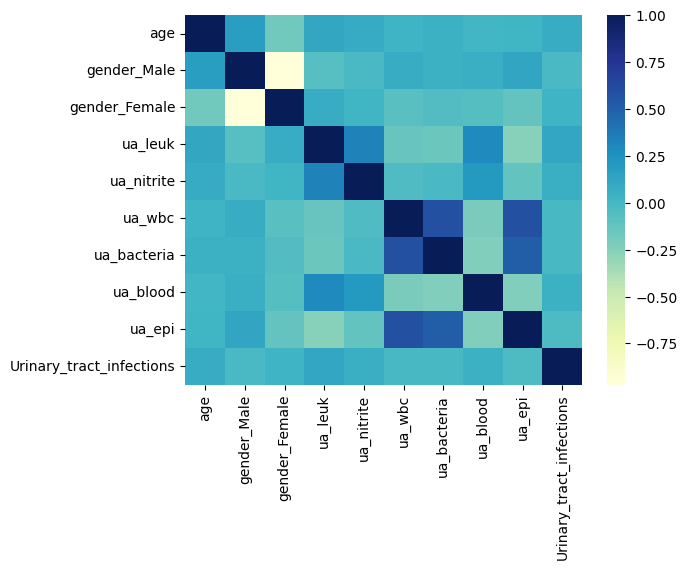

In [23]:
# correlation of top 10 expert chosen variables
cols = ['age', 'gender_Male','gender_Female','ua_leuk','ua_nitrite','ua_wbc','ua_bacteria','ua_blood','ua_epi','Urinary_tract_infections', 'dysuria']
sns.heatmap(data_recoded[cols].corr(), cmap='YlGnBu')

**Chi-squared test of independence (for categorical variables)**

In [23]:
import scipy.stats as stats

# Perform the Chi-Square Test of Independence
x_sq_results = []

for col in data_recoded[1:]:
    compare = pd.crosstab(data_recoded[col],data_recoded['UCX_abnormal'])
    chi2, p, dof, ex = stats.chi2_contingency(compare)
    result = [chi2, p, dof, ex]
    x_sq_results.append(result)

In [24]:
# Create data frame of X2 results
x_sq_results = pd.DataFrame(x_sq_results)
x_sq_results.columns = ['test_stat','p_val','dof','exp_val']
x_sq_results

,test_stat,p_val,dof,exp_val
0,36564.000109,0.000000e+00,1,"[[9142.0, 9142.0], [9142.0, 9142.0]]"
1,8114.322396,0.000000e+00,5,"[[1485.5, 1485.5], [5332.5, 5332.5], [2478.0, ..."
2,89.642116,1.568653e-18,4,"[[16372.0, 16372.0], [1328.5, 1328.5], [288.5,..."
3,2565.639931,0.000000e+00,4,"[[8857.0, 8857.0], [3568.0, 3568.0], [2062.0, ..."
4,4965.340655,0.000000e+00,2,"[[7544.0, 7544.0], [6819.5, 6819.5], [3920.5, ..."
...,...,...,...,...
311,51.789061,6.179514e-13,1,"[[1565.0, 1565.0], [16719.0, 16719.0]]"
312,0.000000,1.000000e+00,1,"[[18283.5, 18283.5], [0.5, 0.5]]"
313,0.000000,1.000000e+00,1,"[[18283.5, 18283.5], [0.5, 0.5]]"
314,0.000000,1.000000e+00,1,"[[18283.5, 18283.5], [0.5, 0.5]]"


In [25]:
# Filter for the non- significant variables (independent/Accept Ho)
accept_independent = x_sq_results[x_sq_results['p_val'] > 0.05]
accept_independent

,test_stat,p_val,dof,exp_val
39,4.718659,0.094484,2,"[[3165.5, 3165.5], [1977.5, 1977.5], [13141.0,..."
113,1.263126,0.261060,1,"[[17725.0, 17725.0], [559.0, 559.0]]"
114,0.000000,1.000000,1,"[[18044.5, 18044.5], [239.5, 239.5]]"
116,0.000000,1.000000,1,"[[18199.5, 18199.5], [84.5, 84.5]]"
125,3.404410,0.065022,1,"[[18219.0, 18219.0], [65.0, 65.0]]"
...,...,...,...,...
310,1.066559,0.301724,1,"[[18261.0, 18261.0], [23.0, 23.0]]"
312,0.000000,1.000000,1,"[[18283.5, 18283.5], [0.5, 0.5]]"
313,0.000000,1.000000,1,"[[18283.5, 18283.5], [0.5, 0.5]]"
314,0.000000,1.000000,1,"[[18283.5, 18283.5], [0.5, 0.5]]"


In [26]:
# Get names of significant columns
non_sig_cols_index = []

for row in accept_independent.index:
    non_sig_cols_index.append(row)

non_sig_cols = []

for i in non_sig_cols_index:
    name = data_recoded.columns[i]
    non_sig_cols.append(name)
    
non_sig_cols

['flank_pain',
 'Abdominal_hernia',
 'Abdominal_pain',
 'Anal_and_rectal_conditions',
 'Diabetes_or_abnormal_glucose_tolerance_complicating_pregnancy__childbirth__or_the_puerperium',
 'Genitourinary_congenital_anomalies',
 'HIV_infection',
 'Hodgkins_disease',
 'Inflammatory_conditions_of_male_genital_organs',
 'Leukemias',
 'Maintenance_chemotherapy__radiotherapy',
 'Menstrual_disorders',
 'Other_female_genital_disorders',
 'Other_male_genital_disorders',
 'Other_non_epithelial_cancer_of_skin',
 'Poisoning_by_nonmedicinal_substances',
 'Sexually_transmitted_infections__not_HIV_or_hepatitis_',
 'ANALGESIC_AND_ANTIHISTAMINE_COMBINATION',
 'ANTI_OBESITY_DRUGS',
 'ANTIALLERGY',
 'ANTIARTHRITICS',
 'ANTIDOTES',
 'ANTIHISTAMINE_AND_DECONGESTANT_COMBINATION',
 'ANTIHISTAMINES',
 'ANTIINFECTIVES_MISCELLANEOUS',
 'ANTIPARKINSON_DRUGS',
 'BIOLOGICALS',
 'CONTRACEPTIVES',
 'IMMUNOSUPPRESANT',
 'INVESTIGATIONAL',
 'PRE_NATAL_VITAMINS',
 'SMOKING_DETERRENTS',
 'chief_complaint_6',
 'chief_complain

In [150]:
# Create X,y splits 

X = data_recoded.drop(non_sig_cols,axis=1)
X = data_recoded.drop('UCX_abnormal',axis=1)
y = data_recoded['UCX_abnormal']
# Split data (original study did an 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Logistic Regression Model**

In [28]:
# Perform logistic regression
logreg = LogisticRegression(max_iter = int(1e4))

# Fit to the training set
logreg.fit(X_train,y_train)

# Predict test-set labels
lg_y_pred = logreg.predict(X_test)

In [29]:
# Evaluate test-set accuracy
lg_score = accuracy_score(y_test,lg_y_pred)
print('Logistic regression accuracy: {}%'.format(round((lg_score*100),2)))

Logistic regression accuracy: 79.22%


In [169]:
from sklearn.model_selection import cross_val_score, KFold

# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
log_cv_scores = cross_val_score(logreg, X_train, y_train, cv=kf, scoring = 'accuracy')

# Calculate average cross-validation accuracy
avg_log_acc = np.mean(log_cv_scores)
print('Avg logistic cross-validation accuracy: {}%'.format(round((avg_log_acc*100),2)))

Avg logistic cross-validation accuracy: 78.58%


In [170]:
# F1 score, precision (PPV), recall(sensitivity)

print('Logistic Confusion Matrix \n{}'.format(confusion_matrix(y_test, lg_y_pred)))
print('Logistic Classification Report \n{}'.format(classification_report(y_test, lg_y_pred)))

Logistic Confusion Matrix 
[[2932  683]
 [ 837 2862]]
Logistic Classification Report 
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      3615
           1       0.81      0.77      0.79      3699

    accuracy                           0.79      7314
   macro avg       0.79      0.79      0.79      7314
weighted avg       0.79      0.79      0.79      7314



In [63]:
# Calculate specificity and NPV
spe = 2862/(683+2863)
npv = 2932/(683+2932)
print('LogReg Specificity: {}\nLogReg NPV: {}'.format(spe, npv))

LogReg Specificity: 0.8071065989847716
LogReg NPV: 0.8110650069156293


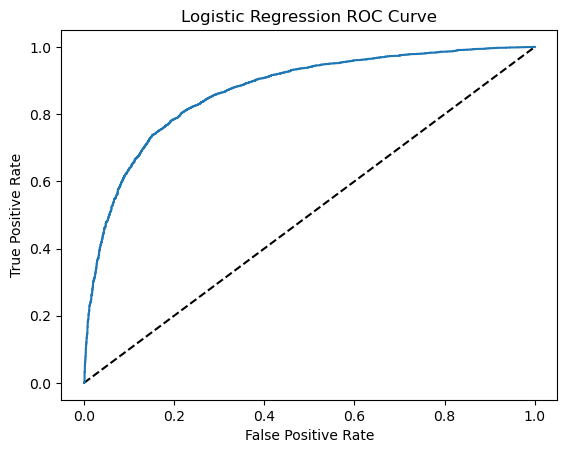

AUC = 0.8684583736698304


In [31]:
#Predict probabilities
lg_y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# Plot the ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, lg_y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

#Get the AUC
from sklearn.metrics import roc_auc_score
lg_auc = roc_auc_score(y_test, lg_y_pred_probs)
print('AUC = {}'.format(lg_auc))

**LASSO Logistic Regression Model**

General Model:

In [32]:
# Train general model
lasso = LogisticRegression(penalty='l1', solver = 'saga', max_iter=int(1e4))
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

In [33]:
# Evaluate test-set accuracy
lasso_score = accuracy_score(y_test,lasso_y_pred)
print('Lasso Logistic Regression accuracy: {}%'.format(round((lasso_score*100),2)))

Lasso Logistic Regression accuracy: 79.26%


In [34]:
# F1 score, precision (PPV), recall(sensitivity)
print(classification_report(y_test, lasso_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      3615
           1       0.81      0.77      0.79      3699

    accuracy                           0.79      7314
   macro avg       0.79      0.79      0.79      7314
weighted avg       0.79      0.79      0.79      7314



Hypertuning the regresion model:

In [35]:
# Grid search the best spasity (since I can't directly change alpha in the L1 penalty)
sparsity_gs = GridSearchCV(estimator = LogisticRegression(penalty='l1', solver = 'saga', max_iter=int(1e4)),
                            scoring = 'accuracy',
                            param_grid = ParameterGrid({"C":[[C] for 
                                                C in [1,0.1,0.01]]}))
sparsity_gs.fit(X_train,y_train)
print(sparsity_gs.best_params_)

{'C': 0.1}


In [36]:
# Retrieve best estimator and check metrics
best_sparsity_gs = sparsity_gs.best_estimator_
print(classification_report(y_test, best_sparsity_gs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      3615
           1       0.81      0.77      0.79      3699

    accuracy                           0.79      7314
   macro avg       0.80      0.80      0.79      7314
weighted avg       0.80      0.79      0.79      7314



Final Model (post-hypertuning):

In [37]:
# Perform LASSO Log Reg
# llregr = LogisticRegression(penalty='l1', solver = 'saga', C = 1, max_iter = int(1e4))
# llregr.fit(X_train, y_train)
llregr = sparsity_gs.best_estimator_
llregr_y_pred = llregr.predict(X_test)

In [38]:
# Evaluate test-set accuracy
llregr_score = accuracy_score(y_test,llregr_y_pred)
print('Lasso Logistic Regression accuracy: {}%'.format(round((llregr_score*100),2)))

Lasso Logistic Regression accuracy: 79.49%


In [39]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
llr_cv_scores = cross_val_score(llregr, X_train, y_train, cv=kf)

# Calculate average cross-validation accuracy
avg_llr_acc = np.mean(llr_cv_scores)
print('Avg lasso log reg cross-validation accuracy: {}%'.format(round((avg_llr_acc*100),2)))

Avg lasso log reg cross-validation accuracy: 78.76%


In [40]:
# F1 score, precision (PPV), recall(sensitivity)
print('Lasso Confusion Matrix \n{}'.format(confusion_matrix(y_test, llregr_y_pred)))
print('Lasso Classification Report \n{}'.format(classification_report(y_test, llregr_y_pred)))

Lasso Confusion Matrix 
[[2951  664]
 [ 836 2863]]
Lasso Classification Report 
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      3615
           1       0.81      0.77      0.79      3699

    accuracy                           0.79      7314
   macro avg       0.80      0.80      0.79      7314
weighted avg       0.80      0.79      0.79      7314



In [61]:
# Calculate specificity and NPV
spe = 2863/(664+2863)
npv = 2951/(664+2951)
print('Lasso LogReg Specificity: {}\nLasso LogReg NPV: {}'.format(spe, npv))

Lasso LogReg Specificity: 0.8117380209810037
Lasso LogReg NPV: 0.8163208852005532


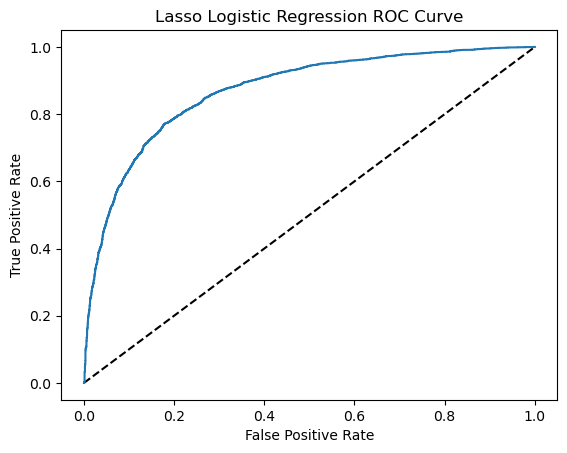

AUC = 0.8698114364579116


In [42]:
#Predict probabilities
llregr_y_pred_probs = llregr.predict_proba(X_test)[:, 1]

# Plot the ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, llregr_y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lasso Logistic Regression ROC Curve')
plt.show()

#Get the AUC
from sklearn.metrics import roc_auc_score
llregr_auc = roc_auc_score(y_test, llregr_y_pred_probs)
print('AUC = {}'.format(llregr_auc))

**CART Model**

General Model (prior to pruning):

In [43]:
# Perform CART with Gini Impurity
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion ='gini', random_state=55)

# Fit to the training set
dt.fit(X_train,y_train)

# Predict test-set labels
dt_y_pred= dt.predict(X_test)

In [44]:
# Evaluate test-set accuracy
dt_score = accuracy_score(y_test,dt_y_pred)
print('Decision tree accuracy: {}%'.format(round((dt_score*100),2)))

Decision tree accuracy: 74.67%


In [45]:
# F1 score, precision (PPV), recall(sensitivity)
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      3615
           1       0.75      0.75      0.75      3699

    accuracy                           0.75      7314
   macro avg       0.75      0.75      0.75      7314
weighted avg       0.75      0.75      0.75      7314



In [46]:
# Understand the tree
print(' This tree had {} nodes and a maxiumum depth of {}.'.format(dt.tree_.node_count,dt.tree_.max_depth))

 This tree had 7367 nodes and a maxiumum depth of 34.


Tree pruning for better model:

In [47]:
# Grid search the best minimum samples split
mdgs = GridSearchCV(estimator = DecisionTreeClassifier(criterion ='gini', random_state=55),
                    scoring = 'accuracy',
                    param_grid = ParameterGrid({"max_depth":[[max_depth] for 
                                                max_depth in [5,10,20,30]]}))
mdgs.fit(X_train,y_train)
print(mdgs.best_params_)

{'max_depth': 10}


In [48]:
# Retrieve best estimator and check metrics
best_mdgs = mdgs.best_estimator_
print(classification_report(y_test, best_mdgs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      3615
           1       0.81      0.80      0.80      3699

    accuracy                           0.80      7314
   macro avg       0.80      0.80      0.80      7314
weighted avg       0.80      0.80      0.80      7314



In [49]:
# Grid search the best minimum samples per leaf
mslgs = GridSearchCV(estimator = DecisionTreeClassifier(max_depth = 10, criterion ='gini', 
                                                        random_state=55),
                    scoring = 'accuracy',
                    param_grid = ParameterGrid({"min_samples_leaf":[[min_samples_leaf] for 
                                                min_samples_leaf in [0.01, 0.05,0.1,0.2,0.3]]}))
mslgs.fit(X_train,y_train)
print(mslgs.best_params_)

{'min_samples_leaf': 0.01}


In [50]:
# Retrieve best estimator and check metrics
best_mslgs = mslgs.best_estimator_
print(classification_report(y_test, best_mslgs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      3615
           1       0.78      0.82      0.80      3699

    accuracy                           0.79      7314
   macro avg       0.79      0.79      0.79      7314
weighted avg       0.79      0.79      0.79      7314



Final Model (post-pruning):

In [51]:
# Perform CART with Gini Impurity using found parameters
dt = DecisionTreeClassifier(max_depth = 10 ,criterion ='gini', random_state=1)

# Fit to the training set
dt.fit(X_train,y_train)

# Predict test-set labels
dt_y_pred= dt.predict(X_test)

In [52]:
# Evaluate test-set accuracy
dt_score = accuracy_score(y_test,dt_y_pred)
print('Decision tree accuracy: {}%'.format(round((dt_score*100),2)))

Decision tree accuracy: 80.3%


In [53]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=kf, scoring = 'accuracy')

# Calculate average cross-validation accuracy
avg_dt_acc = np.mean(dt_cv_scores)
print('Avg decision tree cross-validation accuracy: {}%'.format(round((avg_dt_acc*100),2)))

Avg decision tree cross-validation accuracy: 79.44%


In [54]:
# F1 score, precision (PPV), recall(sensitivity)
print('Decision Tree Confusion Matrix \n{}'.format(confusion_matrix(y_test, dt_y_pred)))
print('Decision Tree Classification Report \n{}'.format(classification_report(y_test, dt_y_pred)))

Decision Tree Confusion Matrix 
[[2919  696]
 [ 745 2954]]
Decision Tree Classification Report 
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      3615
           1       0.81      0.80      0.80      3699

    accuracy                           0.80      7314
   macro avg       0.80      0.80      0.80      7314
weighted avg       0.80      0.80      0.80      7314



In [55]:
# Calculate specificity and NPV
spe = 2954/(696+2954)
npv = 2919/(696+2919)
print('Decision Tree Specificity: {}\nDecision Tree NPV: {}'.format(spe, npv))

Decision Tree Specificity: 0.8093150684931507
Decision Tree NPV: 0.8074688796680498


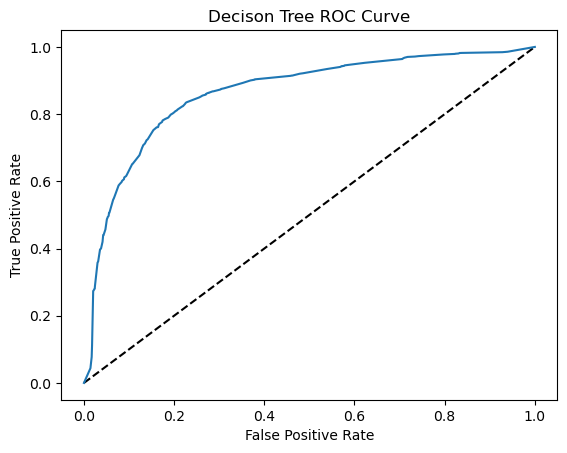

AUC = 0.8627939516380823


In [56]:
# Predict probabilities
dt_y_pred_probs = dt.predict_proba(X_test)[:, 1]

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt_y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decison Tree ROC Curve')
plt.show()

# Get the AUC
dt_auc = roc_auc_score(y_test, dt_y_pred_probs)
print('AUC = {}'.format(dt_auc))

**Support Vector Machine (SVM)**

In [152]:
from sklearn.svm import SVC

# Call svm object  
nlsvm = SVC(probability=True)

# Fit model to training set
nlsvm.fit(X_train, y_train)

# Predict X_test labels
nlsvm_y_pred = nlsvm.predict(X_test)

In [168]:
# Evaluate test-set accuracy
nlsvm_score = accuracy_score(y_test,nlsvm_y_pred)
print('SVM accuracy: {}%'.format(round((nlsvm_score*100),2)))

SVM accuracy: 78.88%


In [167]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
nlsvm_cv_scores = cross_val_score(nlsvm, X_train, y_train, cv=kf, scoring = 'accuracy')

# Calculate average cross-validation accuracy
avg_nlsvm_acc = np.mean(nlsvm_cv_scores)
print('Avg Support Vector Machine cross-validation accuracy: {}%'.format(round((avg_nlsvm_acc*100),2)))

Avg Support Vector Machine cross-validation accuracy: 77.97%


In [154]:
# F1 score, precision (PPV), recall(sensitivity)
print('Support Vector Machine Confusion Matrix \n{}'.format(confusion_matrix(y_test, nlsvm_y_pred)))
print('Support Vector Machine Classification Report \n{}'.format(classification_report(y_test, nlsvm_y_pred)))

Support Vector Machine Confusion Matrix 
[[2864  751]
 [ 794 2905]]
Support Vector Machine Classification Report 
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      3615
           1       0.79      0.79      0.79      3699

    accuracy                           0.79      7314
   macro avg       0.79      0.79      0.79      7314
weighted avg       0.79      0.79      0.79      7314



In [155]:
# Calculate specificity and NPV
spe = 2905/(751+2905)
npv = 2864/(751+2864)
print('Support Vector Machine Specificity: {}\nSupport Vector Machine NPV: {}'.format(spe, npv))

Support Vector Machine Specificity: 0.7945842450765864
Support Vector Machine NPV: 0.7922544951590594


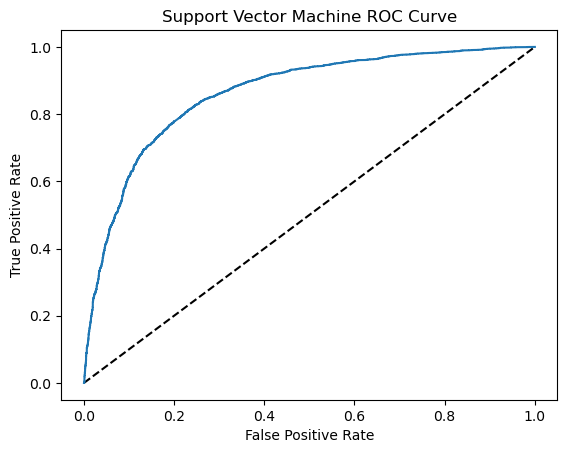

AUC = 0.861652115614216


In [156]:
# Predict probabilities
nlsvm_y_pred_probs = nlsvm.predict_proba(X_test)[:, 1]

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, nlsvm_y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine ROC Curve')
plt.show()

# Get the AUC
nlsvm_auc = roc_auc_score(y_test, nlsvm_y_pred_probs)
print('AUC = {}'.format(nlsvm_auc))

**Random Forest Model**

In [158]:
from sklearn.ensemble import RandomForestClassifier

# Call svm object  
rf = RandomForestClassifier()

# Fit model to training set
rf.fit(X_train, y_train)

# Predict X_test labels
rf_y_pred = rf.predict(X_test)

In [160]:
# Evaluate test-set accuracy
rf_score = accuracy_score(y_test,rf_y_pred)
print('Random Forest accuracy: {}%'.format(round((rf_score*100),2)))

Random Forest accuracy: 81.6%


In [161]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring = 'accuracy')

# Calculate average cross-validation accuracy
avg_rf_acc = np.mean(rf_cv_scores)
print('Avg random forest cross-validation accuracy: {}%'.format(round((avg_rf_acc*100),2)))

Avg random forest cross-validation accuracy: 81.05%


In [163]:
# F1 score, precision (PPV), recall(sensitivity)
print('Random Forest Confusion Matrix \n{}'.format(confusion_matrix(y_test, rf_y_pred)))
print('Random Forest Classification Report \n{}'.format(classification_report(y_test, rf_y_pred)))

Random Forest Confusion Matrix 
[[2858  757]
 [ 589 3110]]
Random Forest Classification Report 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3615
           1       0.80      0.84      0.82      3699

    accuracy                           0.82      7314
   macro avg       0.82      0.82      0.82      7314
weighted avg       0.82      0.82      0.82      7314



In [164]:
# Calculate specificity and NPV
spe = 3110/(757+3110)
npv = 2858/(757+2858)
print('Random Forest Specificity: {}\nRandom Forest NPV: {}'.format(spe, npv))

Random Forest Specificity: 0.804241013705715
Random Forest NPV: 0.790594744121715


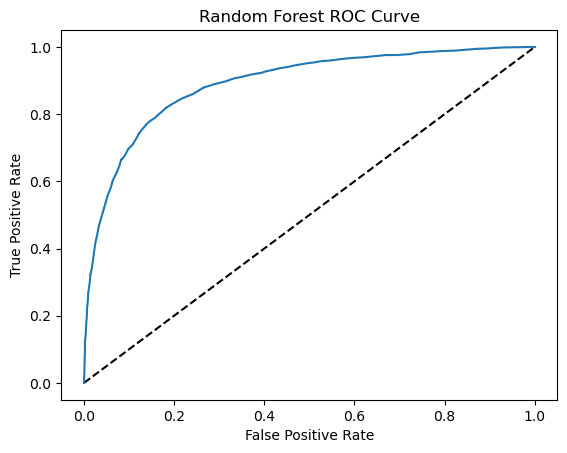

AUC = 0.8904565063190418


In [165]:
# Predict probabilities
rf_y_pred_probs = rf.predict_proba(X_test)[:, 1]

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

# Get the AUC
rf_auc = roc_auc_score(y_test, rf_y_pred_probs)
print('AUC = {}'.format(rf_auc))

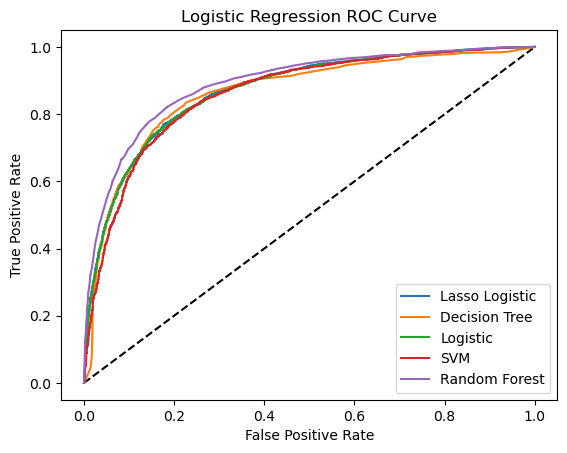

In [166]:
# ROC curve comparison 
plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = roc_curve(y_test, llregr_y_pred_probs)
plt.plot(fpr, tpr,label='Lasso Logistic')
fpr1, tpr1, thresholds1 = roc_curve(y_test, dt_y_pred_probs)
plt.plot(fpr1, tpr1,label='Decision Tree')
fpr2, tpr2, thresholds2 = roc_curve(y_test, lg_y_pred_probs)
plt.plot(fpr2, tpr2, label='Logistic')
fpr3, tpr3, thresholds3 = roc_curve(y_test, nlsvm_y_pred_probs)
plt.plot(fpr3, tpr3, label='SVM')
fpr4, tpr4, thresholds4 = roc_curve(y_test, rf_y_pred_probs)
plt.plot(fpr4, tpr4, label='Random Forest')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

**Principal Component Analysis (PCA)**

In [3]:
# Read encoded file
data_recoded = pd.read_csv('Encoded_UTI_Patient_Data.csv')
#data_recoded.drop('Unnamed: 0', axis=1)

# Preview data
data_recoded.head()

,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,ua_ketones,ua_leuk,...,O2_Dependency_Last_INTUB,O2_Dependency_Last_MASK,O2_Dependency_Last_NASAL,O2_Dependency_Last_NONREB,O2_Dependency_Last_PP,O2_Dependency_Last_ROOM,O2_Dependency_Last_T- piece,O2_Dependency_Last_blow by,O2_Dependency_Last_face tent,O2_Dependency_Last_other (see comments)
0,1,2,1,1,0,2,2,1,1,2,...,0,0,0,0,0,1,0,0,0,0
1,1,2,1,1,0,2,2,1,1,2,...,0,0,0,0,0,1,0,0,0,0
2,1,4,1,1,1,2,6,1,1,4,...,0,0,0,0,0,1,0,0,0,0
3,1,2,2,4,1,2,4,1,4,2,...,0,0,0,0,0,1,0,0,0,0
4,1,2,1,3,1,2,2,1,1,4,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Create X,y splits 
X = data_recoded.drop('UCX_abnormal',axis=1)
y = data_recoded['UCX_abnormal']

from sklearn.preprocessing import StandardScaler

# Scale data
X_std = StandardScaler().fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(X_std)

# Print the explained variance ratio for each principal component
exp_var = pca.explained_variance_ratio_

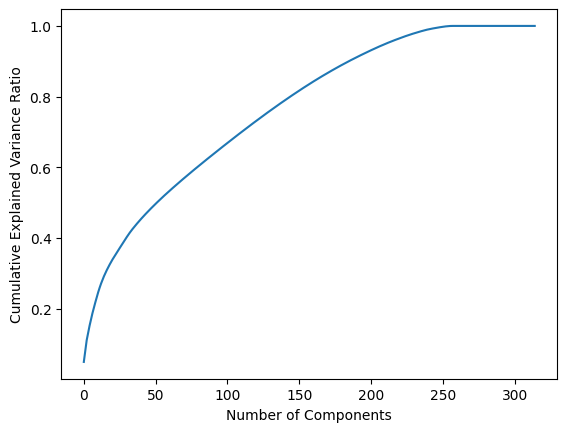

In [6]:
# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(exp_var))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [7]:
# Perform PCA
pca2 = PCA(n_components=125)
pca_data2 = pca.fit_transform(X_std)

In [8]:
# Split data (original study did an 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(pca_data2, y, test_size=0.2, random_state=1)

Logistic Regression Model

In [11]:
# Perform logistic regression

pcalogreg = LogisticRegression(max_iter = int(1e4))

# Fit to the training set
pcalogreg.fit(X_train, y_train)

# Predict test-set labels
pcalg_y_pred = pcalogreg.predict(X_test)

In [12]:
# Evaluate test-set accuracy
pcalg_score = accuracy_score(y_test,pcalg_y_pred)
print('Logistic regression accuracy: {}%'.format(round((pcalg_score*100),2)))

Logistic regression accuracy: 79.07%


In [13]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lr_cv_scores = cross_val_score(pcalogreg, X_train, y_train, cv=kf, scoring = 'accuracy')

# Calculate average cross-validation accuracy
avg_lr_acc = np.mean(lr_cv_scores)
print('Avg logistic cross-validation accuracy: {}%'.format(round((avg_lr_acc*100),2)))

Avg logistic cross-validation accuracy: 78.64%


In [14]:
# F1 score, precision (PPV), recall(sensitivity)
print(confusion_matrix(y_test, pcalg_y_pred))
print(classification_report(y_test, pcalg_y_pred))

[[2925  690]
 [ 841 2858]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      3615
           1       0.81      0.77      0.79      3699

    accuracy                           0.79      7314
   macro avg       0.79      0.79      0.79      7314
weighted avg       0.79      0.79      0.79      7314



In [15]:
# Calculate specificity and NPV
spe = 2861/(683+2861)
npv = 2932/(683+2932)
print('Logistic Regression Specificity: {}\nLogistic Regression NPV: {}'.format(spe, npv))

Logistic Regression Specificity: 0.8072799097065463
Logistic Regression NPV: 0.8110650069156293


CART Model

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Perform CART with Gini Impurity using found parameters
pca_dt = DecisionTreeClassifier(max_depth = 10 ,criterion ='gini', random_state=1)

# Fit to the training set
pca_dt.fit(X_train,y_train)

# Predict test-set labels
pca_dt_y_pred= pca_dt.predict(X_test)

In [12]:
# Evaluate test-set accuracy
pca_dt_score = accuracy_score(y_test,pca_dt_y_pred)
print('Decision tree accuracy: {}%'.format(round((pca_dt_score*100),2)))

Decision tree accuracy: 65.98%


In [13]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
pca_dt_cv_scores = cross_val_score(pca_dt, X_train, y_train, cv=kf, scoring = 'accuracy')

# Calculate average cross-validation accuracy
pca_avg_dt_acc = np.mean(pca_dt_cv_scores)
print('Avg decision tree cross-validation accuracy: {}%'.format(round((pca_avg_dt_acc*100),2)))

Avg decision tree cross-validation accuracy: 65.82%


In [14]:
# F1 score, precision (PPV), recall(sensitivity)
print('Decision Tree Confusion Matrix \n{}'.format(confusion_matrix(y_test, pca_dt_y_pred)))
print('Decision Tree Classification Report \n{}'.format(classification_report(y_test, pca_dt_y_pred)))

Decision Tree Confusion Matrix 
[[2355 1260]
 [1228 2471]]
Decision Tree Classification Report 
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      3615
           1       0.66      0.67      0.67      3699

    accuracy                           0.66      7314
   macro avg       0.66      0.66      0.66      7314
weighted avg       0.66      0.66      0.66      7314



In [15]:
# Calculate specificity and NPV
spe = 2471/(1260+2471)
npv = 2355/(1260+2355)
print('Decision Tree Specificity: {}\nDecision Tree NPV: {}'.format(spe, npv))

Decision Tree Specificity: 0.6622889305816135
Decision Tree NPV: 0.6514522821576764


Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC

# Call svm object  
pca_nlsvm = SVC(probability=True)

# Fit model to training set
pca_nlsvm.fit(X_train, y_train)

# Predict X_test labels
pca_nlsvm_y_pred = pca_nlsvm.predict(X_test)

In [17]:
# Evaluate test-set accuracy
pca_nlsvm_score = accuracy_score(y_test,pca_nlsvm_y_pred)
print('SVM accuracy: {}%'.format(round((pca_nlsvm_score*100),2)))

SVM accuracy: 79.92%


In [18]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
pca_nlsvm_cv_scores = cross_val_score(pca_nlsvm, X_train, y_train, cv=kf, scoring = 'accuracy')

# Calculate average cross-validation accuracy
pca_avg_nlsvm_acc = np.mean(pca_nlsvm_cv_scores)
print('Avg Support Vector Machine cross-validation accuracy: {}%'.format(round((pca_avg_nlsvm_acc*100),2)))

Avg Support Vector Machine cross-validation accuracy: 79.05%


In [19]:
# F1 score, precision (PPV), recall(sensitivity)
print('Support Vector Machine Confusion Matrix \n{}'.format(confusion_matrix(y_test, pca_nlsvm_y_pred)))
print('Support Vector Machine Classification Report \n{}'.format(classification_report(y_test, pca_nlsvm_y_pred)))

Support Vector Machine Confusion Matrix 
[[2938  677]
 [ 792 2907]]
Support Vector Machine Classification Report 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3615
           1       0.81      0.79      0.80      3699

    accuracy                           0.80      7314
   macro avg       0.80      0.80      0.80      7314
weighted avg       0.80      0.80      0.80      7314



In [20]:
# Calculate specificity and NPV
spe = 2907/(677+2907)
npv = 2938/(677+2938)
print('Support Vector Machine Specificity: {}\nSupport Vector Machine NPV: {}'.format(spe, npv))

Support Vector Machine Specificity: 0.8111049107142857
Support Vector Machine NPV: 0.8127247579529737


Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Call svm object  
pca_rf = RandomForestClassifier()

# Fit model to training set
pca_rf.fit(X_train, y_train)

# Predict X_test labels
pca_rf_y_pred = pca_rf.predict(X_test)

In [23]:
# Evaluate test-set accuracy
pca_rf_score = accuracy_score(y_test,pca_rf_y_pred)
print('Random Forest accuracy: {}%'.format(round((pca_rf_score*100),2)))

Random Forest accuracy: 74.17%


In [24]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
pca_rf_cv_scores = cross_val_score(pca_rf, X_train, y_train, cv=kf, scoring = 'accuracy')

# Calculate average cross-validation accuracy
pca_avg_rf_acc = np.mean(pca_rf_cv_scores)
print('Avg random forest cross-validation accuracy: {}%'.format(round((pca_avg_rf_acc*100),2)))

Avg random forest cross-validation accuracy: 73.11%


In [25]:
# F1 score, precision (PPV), recall(sensitivity)
print('Random Forest Confusion Matrix \n{}'.format(confusion_matrix(y_test, pca_rf_y_pred)))
print('Random Forest Classification Report \n{}'.format(classification_report(y_test, pca_rf_y_pred)))

Random Forest Confusion Matrix 
[[2664  951]
 [ 938 2761]]
Random Forest Classification Report 
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3615
           1       0.74      0.75      0.75      3699

    accuracy                           0.74      7314
   macro avg       0.74      0.74      0.74      7314
weighted avg       0.74      0.74      0.74      7314



In [26]:
# Calculate specificity and NPV
spe = 2761/(951+2761)
npv = 2664/(951+2664)
print('Random Forest Specificity: {}\nRandom Forest NPV: {}'.format(spe, npv))

Random Forest Specificity: 0.7438038793103449
Random Forest NPV: 0.7369294605809129


LASSO Logistic Regression

In [27]:
# Perform LASSO Log Reg
pca_llregr = LogisticRegression(penalty='l1', solver = 'saga', C = 1, max_iter = int(1e4))
pca_llregr.fit(X_train, y_train)
pca_llregr_y_pred = pca_llregr.predict(X_test)

In [38]:
# Evaluate test-set accuracy
pca_llregr_score = accuracy_score(y_test,pca_llregr_y_pred)
print('Lasso Logistic Regression accuracy: {}%'.format(round((pca_llregr_score*100),2)))

Lasso Logistic Regression accuracy: 79.49%


In [39]:
# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
pca_llr_cv_scores = cross_val_score(pca_llregr, X_train, y_train, cv=kf)

# Calculate average cross-validation accuracy
pca_avg_llr_acc = np.mean(pca_llr_cv_scores)
print('Avg lasso log reg cross-validation accuracy: {}%'.format(round((pca_avg_llr_acc*100),2)))

Avg lasso log reg cross-validation accuracy: 78.76%


In [28]:
# F1 score, precision (PPV), recall(sensitivity)
print('Lasso Confusion Matrix \n{}'.format(confusion_matrix(y_test, pca_llregr_y_pred)))
print('Lasso Classification Report \n{}'.format(classification_report(y_test, pca_llregr_y_pred)))

Lasso Confusion Matrix 
[[2925  690]
 [ 839 2860]]
Lasso Classification Report 
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      3615
           1       0.81      0.77      0.79      3699

    accuracy                           0.79      7314
   macro avg       0.79      0.79      0.79      7314
weighted avg       0.79      0.79      0.79      7314



In [29]:
# Calculate specificity and NPV
spe = 2860/(690+2860)
npv = 2860/(690+2860)
print('Lasso LogReg Specificity: {}\nLasso LogReg NPV: {}'.format(spe, npv))

Lasso LogReg Specificity: 0.8056338028169014
Lasso LogReg NPV: 0.8056338028169014


**Uniform Manifold Approximation and Projection (UMAP)** - Running this out of curiosity; there is much I need to learn about this technique.

In [46]:
from umap import UMAP

# Perform UMAP with 5 dimensions
umap_model = UMAP(n_components=2, random_state=42)
umap_data = umap_model.fit_transform(X_std)

C:\Users\alays\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


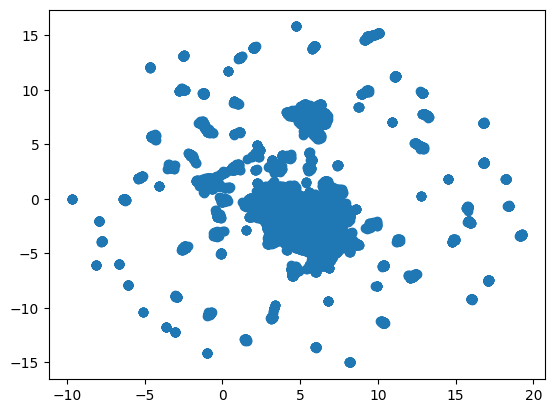

In [47]:
# Plot the results
import matplotlib.pyplot as plt

plt.scatter(umap_data[:, 0], umap_data[:, 1])
plt.show()

In [48]:
# Split data (original study did an 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(umap_data, y, test_size=0.2, random_state=1)

Logistic Regression Model

In [49]:
# Perform logistic regression

umap_logreg = LogisticRegression(max_iter = int(1e4))

# Fit to the training set
umap_logreg.fit(X_train, y_train)

# Predict test-set labels
umap_lg_y_pred = umap_logreg.predict(X_test)

In [50]:
# Evaluate test-set accuracy
umap_lg_score = accuracy_score(y_test,umap_lg_y_pred)
print('Logistic regression accuracy: {}%'.format(round((umap_lg_score*100),2)))

Logistic regression accuracy: 53.23%
